In [169]:
import numpy as np
import matplotlib.pyplot as plt

# Week-3

**Note to Learners**: 

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. 

**Do not edit this cell.**

In [170]:
np.random.seed(0)

N = 2000
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))


## Problem 1
How many samples are there in the dataset?



## Solution

In [171]:
# Enter your solution here
X.shape[0]

1998

## Problem 2

How many features are there in the dataset?


## Solution

In [172]:
# Enter your solution here
X.shape[1]

2

## Problem 3
Plot the dataset using matplotlib.



## Solution

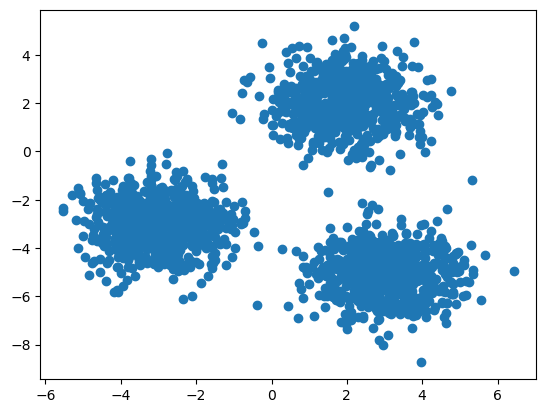

In [173]:
# Enter your solution here
plt.scatter(X[:, 1], X[:, 0])
plt.show()

## Instruction

Assume k = 3. Take the data points with indices 200, 800 and 1200 in X to be the initial cluster centers.


In [174]:
# Enter your code here
cluster_centers = [X[200], X[800], X[1200]]

## Problem 4 

Write a function `assign_clusters(X, k, cluster_centers)` that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector `z`, where $z[i] \in \{0, 1, 2\}$.

What is the mean of the values in vector `z`? Provide the answer correct up to three decimal places.



## Solution

In [175]:
# Enter your solution here
def assign_clusters(X, k, cluster_centers):
    z = np.zeros((X.shape[0],))

    for j in range(X.shape[0]):
        mx = 10**10
        for i in range(k):
            tmp = (X[j].T - cluster_centers[i].T).T@(X[j].T - cluster_centers[i].T)
            if tmp < mx:
                mx = tmp
                z[j] = i
    

    return z

In [176]:
z = assign_clusters(X, 3, cluster_centers)
np.mean(z, axis=0)

0.7107107107107107

## Problem 5

Plot the data points, with different color for different clusters.


## Solution

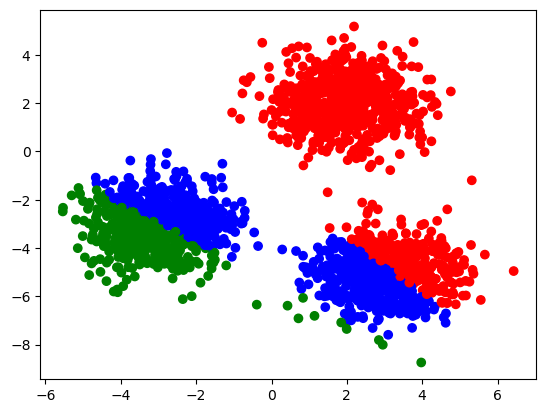

None


In [177]:
# Enter your solution here
color_map = ['red', 'blue', 'green']
colors = [color_map[int(i)] for i in z[:]]

plt.scatter(X[:, 1], X[:, 0], c=colors)
print(plt.show())

## Problem 6
Write a function `compute_cluster_centers(X, z, k)` that computes the clusters' centers as per z and returns `k` new cluster centers.

What is the mean of the three cluster centers? Provide the $x_1$ and $y_1$ component. Provide both components correct up to three decimal places.



## Solution

In [178]:
# Enter your solution here
def compute_cluster_centers(X, z, k):
    cluster_centers = [0] * k
    totals = [0] * k

    for i in range(X.shape[0]):
        cluster_centers[int(z[i])] += X[i]
        totals[int(z[i])] += 1

    for i in range(k):
        cluster_centers[i] /= totals[i]

    return cluster_centers

In [179]:
cluster_centers_ = compute_cluster_centers(X, z, 3)
np.mean(cluster_centers_, axis=0)

array([-2.55251646, -0.19225194])

## Extra

Keep executing the code in problems 4, 5 and 6 (for, say, 10 iterations) to observe how the clusters change across different iterations.

## Solution

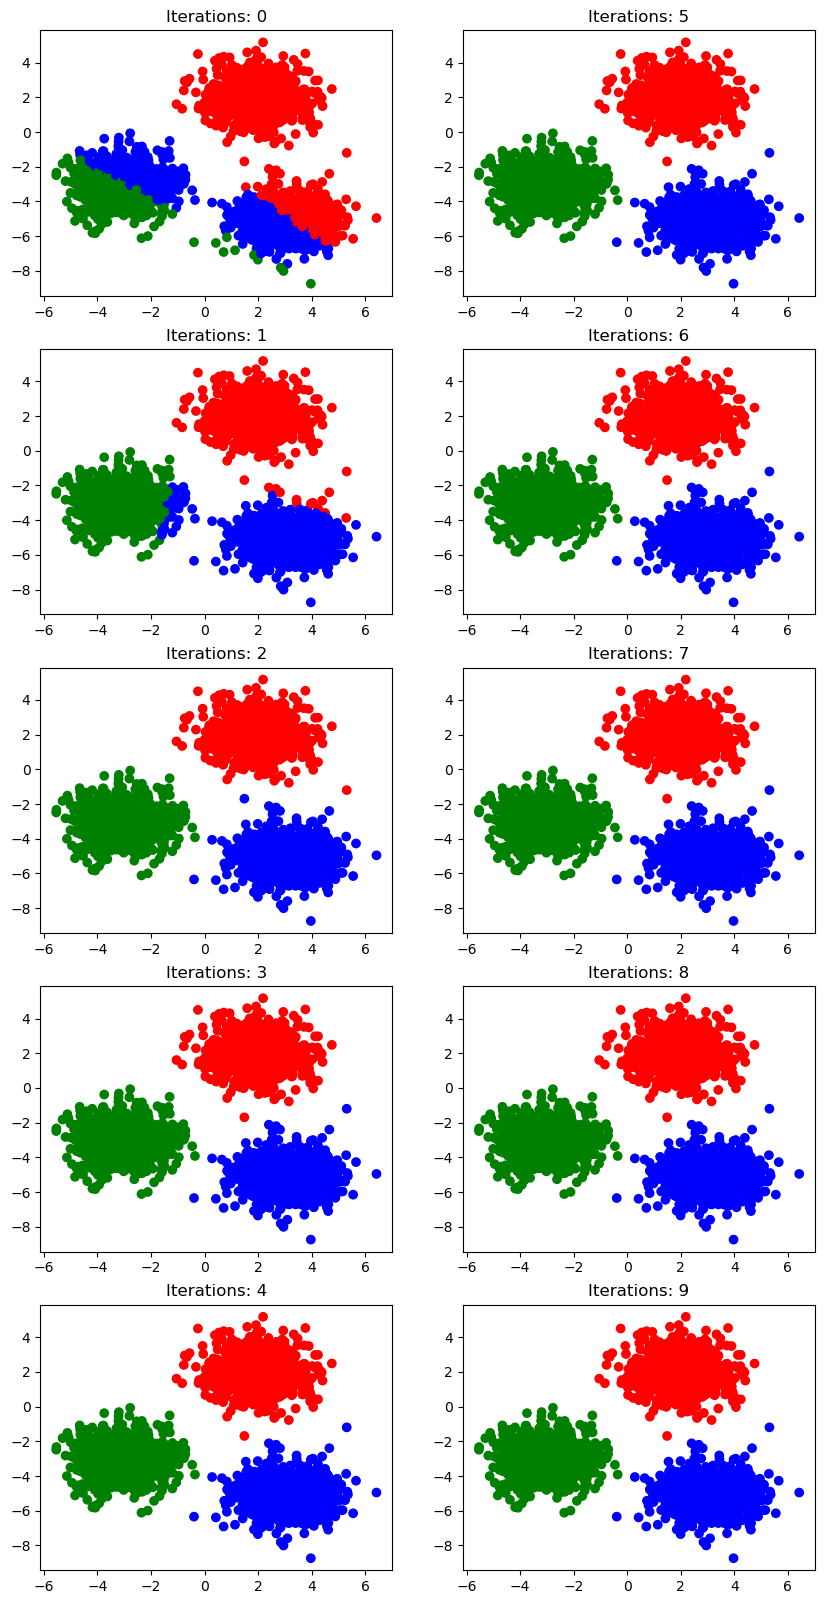

In [180]:
# Enter your code here
fig, axes = plt.subplots(5,2, figsize = (10,20))

for i in range(10):
    color_map = ['red', 'blue', 'green']
    colors = [color_map[int(i)] for i in z[:]]

    axes[(i % 5), (0 if i < 5 else 1)].scatter(X[:, 1], X[:, 0], c=colors)
    axes[(i % 5), (0 if i < 5 else 1)].set_title("Iterations: " + str(i))

    cluster_centers = compute_cluster_centers(X, z, 3)
    z = assign_clusters(X, 3, cluster_centers)

plt.show()